In [11]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [12]:
cd /content/drive/MyDrive/Colab/3.lesionDetect/

/content/drive/MyDrive/Colab/3.lesionDetect


In [13]:
ls

'235855_병변 검출 AI 경진대회_data.zip'   LesionDetect.ipynb
 data/                                   'YOLOv5 base line.ipynb'


In [14]:
DATA_PATH = "./data"
TRAIN_DATA = "./data/train"

In [74]:
import cv2
from PIL import Image
import json
import base64
from io import BytesIO
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [17]:
jsonPath = glob(TRAIN_DATA + "/*.json")

class_id = {
    "01_ulcer" : 1,
    "02_mass" : 2,
    "04_lymph" : 3,
    "05_bleeding" : 4
}

In [94]:
with open(jsonPath[0]) as f:
    jsonRead = json.load(f)

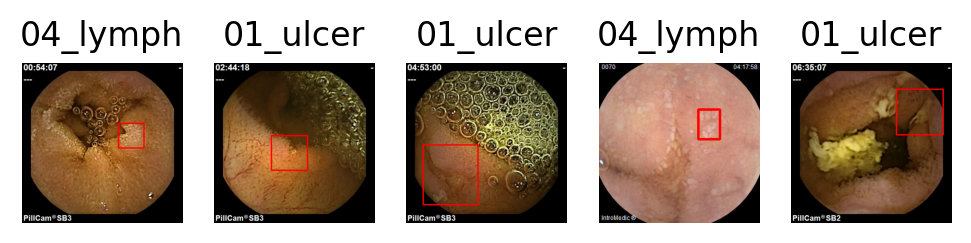

In [93]:
images = []
for imagePath in range(5):
    with open(jsonPath[imagePath]) as f:
        jsonRead = json.load(f)

        image = Image.open(BytesIO(base64.b64decode(jsonRead['imageData'])))
        image = np.array(image, np.uint8)

        shape = jsonRead['shapes'][0]
        ps = shape['points']

        x_min = int(np.min(np.array(ps)[:,0]))
        x_max = int(np.max(np.array(ps)[:,0]))
        y_min = int(np.min(np.array(ps)[:,1]))
        y_max = int(np.max(np.array(ps)[:,1]))

        image = cv2.rectangle(image, (x_min,y_min), (x_max, y_max),(255,0,0), 3)
        data = {
            "image" : image,
            "label" : shape['label']
        }
        images.append(data)

fix, axes = plt.subplots(ncols=5, squeeze=False, dpi=200)

for i, image in enumerate(images):
    axes[0, i].imshow(np.asarray(image['image']))
    axes[0, i].axis('off')
    axes[0, i].set_title(image['label'])
